## Using only NumPy and Matplotlib to build the model from scratch, without using Scikit-Learn or other pre-built libraries.

In [10]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

          SqFt  Bedrooms   Distance        Age          Price
0  1698.685661         2   6.478282  21.222975  218308.699328
1  1444.694280         4   2.957694  25.432980  214721.270828
2  1759.075415         2   2.216854  20.488601  237559.472594
3  2109.211943         3  13.030050  20.405917  250790.873467
4  1406.338650         4   3.597853  12.980083  228732.649069


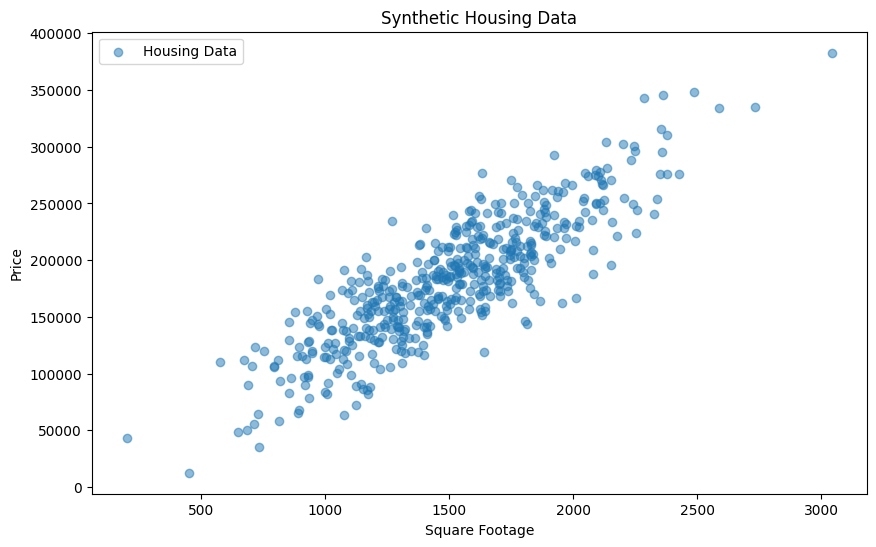

In [12]:
# Generating synthetic housing data
np.random.seed(42)

# Features: square footage, number of bedrooms, distance to city center, age of the house
num_samples = 500
sqft = np.random.normal(1500, 400, num_samples)  # Square footage
bedrooms = np.random.randint(1, 5, num_samples)  # Bedrooms (1 to 4)
distance = np.random.normal(10, 5, num_samples)  # Distance to city center
age = np.random.normal(20, 10, num_samples)  # Age of the house

# Target (Price)
price = 50000 + (sqft * 120) + (bedrooms * 10000) - (distance * 3000) - (age * 2000) + np.random.normal(0, 10000, num_samples)

# Combine into a DataFrame
data = pd.DataFrame({
    'SqFt': sqft,
    'Bedrooms': bedrooms,
    'Distance': distance,
    'Age': age,
    'Price': price
})

# Visualize the data
print(data.head())

# Plot the relationship between sqft and price
plt.figure(figsize=(10, 6))
plt.scatter(data['SqFt'], data['Price'], alpha=0.5, label='Housing Data')
plt.xlabel('Square Footage')
plt.ylabel('Price')
plt.title('Synthetic Housing Data')
plt.legend()
plt.show()


### Data Preparation
<li>Normalization of the features for better convergence.</li>
<li>Adding the bias term (intercept) manually.</li>

In [14]:
# Normalize the features
def normalize(X):
    return (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Prepare the data
X = data[['SqFt', 'Bedrooms', 'Distance', 'Age']].values
y = data['Price'].values.reshape(-1, 1)

# Normalize the features
X_normalized = normalize(X)

# Add bias (intercept) term
X_with_bias = np.c_[np.ones(X_normalized.shape[0]), X_normalized]

# Initialize weights
weights = np.random.randn(X_with_bias.shape[1], 1)

### Linear Regression model using:

 <li>Gradient Descent for parameter optimization.</li>
 <li>Mean Squared Error (MSE) as the loss function.</li>

### Linear Regression Functions 
<ol>
    <li>Prediction Function: <b>ŷ = 𝑋⋅𝑊</b></li>
    <li>Mean Squared Error (MSE) as the cost function</li>
    <li>Gradient Descent for optimization</li>
</ol>

In [50]:
# Prediction function
def predict(X, weights):
    return np.dot(X, weights)

# Mean Squared Error
def mse(y, y_pred):
    return np.mean((y - y_pred) ** 2)

# Gradient Descent
def gradient_descent(X, y, weights, learning_rate, epochs):
    m = len(y)
    history = []

    for i in range(epochs):
        # Prediction
        y_pred = predict(X, weights)
        
        # Gradient calculation
        gradient = -(2/m) * np.dot(X.T, (y - y_pred))
        
        # Update weights
        weights -= learning_rate * gradient
        
        # Calculate cost
        cost = mse(y, y_pred)
        history.append(cost)

        # Print progress every 100 iterations
        if i % 100 == 0:
            print(f'Epoch {i}, Cost: {cost:.4f}')
    
    return weights, history

### Train the Model
We'll train the model using gradient descent with:

Learning rate: 0.01

Epochs: 1000

Epoch 0, Cost: 36219158845.6018
Epoch 100, Cost: 737391704.8479
Epoch 200, Cost: 106547330.5291
Epoch 300, Cost: 95214734.5412
Epoch 400, Cost: 95008504.2104
Epoch 500, Cost: 95004687.5592
Epoch 600, Cost: 95004615.3617
Epoch 700, Cost: 95004613.9576
Epoch 800, Cost: 95004613.9294
Epoch 900, Cost: 95004613.9288


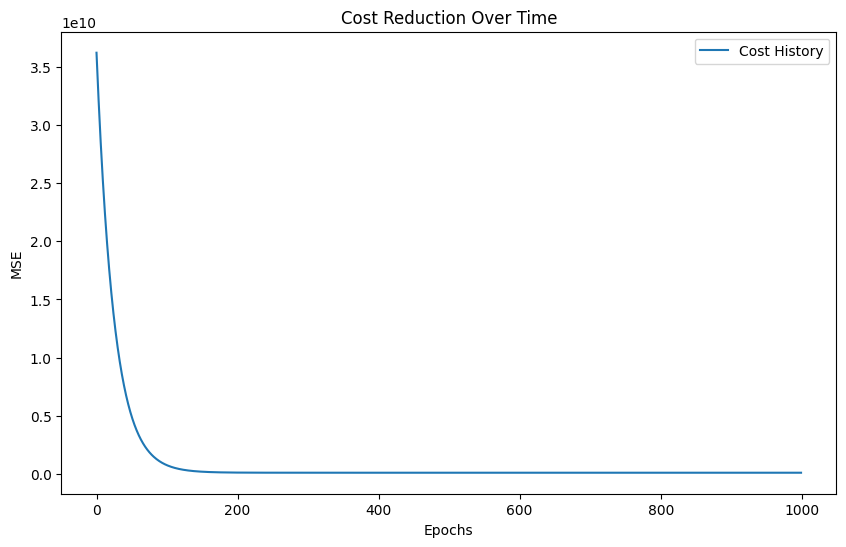

In [44]:
# Parameters
learning_rate = 0.01
epochs = 1000

# Train the model
weights, cost_history = gradient_descent(X_with_bias, y, weights, learning_rate, epochs)

# Plotting the cost over epochs
plt.figure(figsize=(10, 6))
plt.plot(range(epochs), cost_history, label='Cost History')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('Cost Reduction Over Time')
plt.legend()
plt.show()

#### Model Evaluation
Make predictions

Calculate MSE

Visualize the actual vs. predicted values

Final Mean Squared Error: 95004613.9288


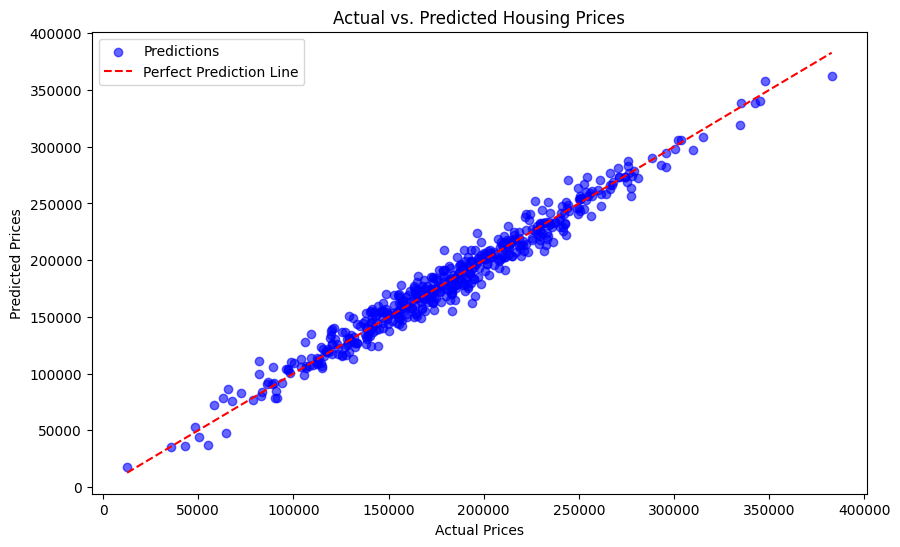

In [48]:
# Make predictions
y_pred = predict(X_with_bias, weights)

# Calculate MSE
mse_value = mse(y, y_pred)
print(f"Final Mean Squared Error: {mse_value:.4f}")

# Visualize predictions vs. actual prices
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, alpha=0.6, color='blue', label='Predictions')
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--', label='Perfect Prediction Line')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Housing Prices')
plt.legend()
plt.show()